### Shadow and Gaussian $\Sigma$ matrix comparison

Shadow code from 'blicon/tes_beamline01' simulation on sirepo.com/shadow

In [1]:
import numpy as np
import shadow_blicon_util as sbu
import transfer_mat_bl as tmb
import Shadow.ShadowTools
import copy

%matplotlib inline
import matplotlib.pyplot as plt

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

#### Beam parameters

In [2]:
ph_E = 9e3        # photon energy [eV]
# sigx_init = 1e-3  # initial horizontal beam size [cm]
sigx_init = 1e-3  # initial horizontal beam size [cm]
sigz_init = 1e-3  # initial vertical beam size [cm]
sigdix_init = 1.1200929999999999e-06  # initial horizontal divergence [rad]
sigdiz_init = 1.1200929999999999e-06  # initial vertical divergence [rad]

#### Calculate coherence

In [3]:
# wavelength [cm]
hc = 1.2398419843320026   # hc quantity [eV micron]
ph_lambda = hc / ph_E * 1e-6 * 1e2

# calculate m squared values horizontal and vertical
m_sq_x = sigx_init * sigdix_init / (ph_lambda / 4 / np.pi)
m_sq_z = sigz_init * sigdiz_init / (ph_lambda / 4 / np.pi)

print('m squared value horizontal: %s' %(m_sq_x)) 
print('m squared value vertical: %s' %(m_sq_z)) 

m squared value horizontal: 1.021739346189318
m squared value vertical: 1.021739346189318


#### Run Shadow simulation with dense Gaussian dist rays

In [4]:
beam_gsn_init = sbu.shadow_src_beam(n_rays=100000, ran_seed=15829, dist_type=3, sigx=sigx_init, sigz=sigz_init, 
                                sigdix=sigdix_init, sigdiz=sigdiz_init, hdiv1 = 0.0, hdiv2 = 0.0, vdiv1 =0.0, 
                                vdiv2=0.0, ph_energy = 9e3)

# create a duplicate of initial beam object to be transformed during propagation
beam_gsn_init_copy = beam_gsn_init.duplicate()
beam_gsn_fin = sbu.run_shdw_tes(beam_gsn_init_copy)

 Generated         5000  rays out of       100000
                  10000
                  15000
                  20000
                  25000
                  30000
                  35000
                  40000
                  45000
                  50000
                  55000
                  60000
                  65000
                  70000
                  75000
                  80000
                  85000
                  90000
                  95000
                 100000
 Exit from SOURCE
 Call to RESET
 Exit from RESET
 Call to SETSOUR
 Exit from SETSOUR
 Call to IMREF
 Exit from IMREF
 Call to OPTAXIS
 Exit from OPTAXIS
 Call to MSETUP
 Exit from MSETUP
 Call to RESTART
 Exit from RESTART
 Call to MIRROR
 MIRROR1: Warning: Empty element (no mirr.xx file)
 Call to SCREEN
 Exit from SCREEN
 Call to IMAGE
 Exit from IMAGE
 Call to DEALLOC
 Exit from DEALLOC
 Call to RESET
 Exit from RESET
 Call to SETSOUR
 Exit from SETSOUR
 Call to IMREF
 Exit from IMREF
 

/home/vagrant/jupyter/rslight/shadow/shadow_blicon_util.py:65: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(np.multiply(xvals_beam,10), np.multiply(yvals_beam,10), data_beam, cmap=plt.cm.Blues)


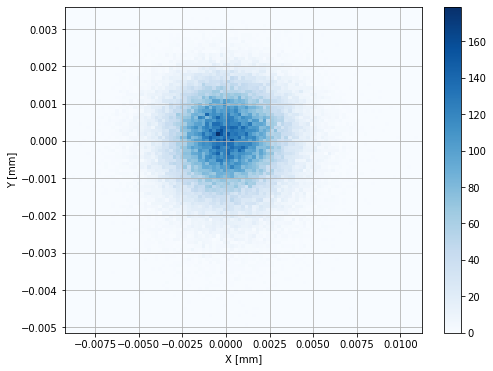

In [5]:
sbu.shdw_plt(beam_gsn_fin)

#### Run Shadow simulation for transfer mat calculation

In [6]:
# epsilon = 1e-6    # beam offest parameter
epsilon = 1e-5      # beam offest parameter

# create initial set of 4 offset rays and 1 central ray
beam_tmat_init = tmb.create_mat_rays(epsilon)

# pass initial rays through beamline
beam_tmat_fin = sbu.run_shdw_tes(beam_tmat_init)

# calculate transfer matrix from final propagated rays
tmat, x_prop_cen, xp_prop_cen, z_prop_cen, zp_prop_cen = tmb.tmat_calc(beam_tmat_fin, epsilon)

print('transfer matrix:', tmat)

 Exit from SOURCE
 Call to RESET
 Exit from RESET
 Call to SETSOUR
 Exit from SETSOUR
 Call to IMREF
 Exit from IMREF
 Call to OPTAXIS
 Exit from OPTAXIS
 Call to MSETUP
 Exit from MSETUP
 Call to RESTART
 Exit from RESTART
 Call to MIRROR
 MIRROR1: Warning: Empty element (no mirr.xx file)
 Call to SCREEN
 Exit from SCREEN
 Call to IMAGE
 Exit from IMAGE
 Call to DEALLOC
 Exit from DEALLOC
 Call to RESET
 Exit from RESET
 Call to SETSOUR
 Exit from SETSOUR
 Call to IMREF
 Exit from IMREF
 Call to OPTAXIS
 Exit from OPTAXIS
 Call to MSETUP
 Exit from MSETUP
 Call to RESTART
 Exit from RESTART
 Call to MIRROR
 Exit from MIRROR
 Call to IMAGE
 Exit from IMAGE
 Call to DEALLOC
 Exit from DEALLOC
 Call to RESET
 Exit from RESET
 Call to SETSOUR
 Exit from SETSOUR
 Call to IMREF
 Exit from IMREF
 Call to OPTAXIS
 Exit from OPTAXIS
 Call to MSETUP
 Exit from MSETUP
 Call to RESTART
 Exit from RESTART
 Call to MIRROR
 MIRROR1: Warning: Empty element (no mirr.xx file)
 Call to IMAGE
 Exit from 

In [7]:
# sbu.shdw_plt(beam_tmat_fin)

##### Check symplecticity
$$T^T J T = J$$

In [8]:
jmat = np.matrix([
    [0, 1, 0, 0],
    [-1, 0, 0, 0],
    [0, 0, 0, 1],
    [0, 0, -1, 0],
])

jmat_calc = np.matmul(np.matmul(tmat.T, jmat), tmat)

print('tmat:', tmat)
print('jmat:', jmat)
print('jmat_calc:', np.round(jmat_calc, 4))

tmat: [[ 1.19521878e-01 -1.50652092e+02  6.27318650e-10  3.91602724e-10]
 [ 3.25158134e-02 -3.85426830e+01 -2.25514074e-12 -1.30110218e-12]
 [-4.77225925e-08  8.39190748e-02  9.30282612e-02 -9.42329184e+00]
 [-7.51886834e-08  1.32360853e-01  1.56030174e-01 -5.52698603e+00]]
jmat: [[ 0  1  0  0]
 [-1  0  0  0]
 [ 0  0  0  1]
 [ 0  0 -1  0]]
jmat_calc: [[ 0.000e+00  2.919e-01 -0.000e+00 -0.000e+00]
 [-2.919e-01  0.000e+00  8.000e-04  7.835e-01]
 [ 0.000e+00 -8.000e-04  0.000e+00  9.562e-01]
 [ 0.000e+00 -7.835e-01 -9.562e-01  0.000e+00]]


#### Compare Shadow vs Sigma matrix rms size

##### Calculate RMS size for Shadow Gaussian dist propagation

In [9]:
sigmax = sbu.rays_sigma(beam_gsn_fin, 0, 0)
# sigdix = sbu.rays_sigma(rays, 3)
sigmaz = sbu.rays_sigma(beam_gsn_fin, 2, 2)
# sigdiz = sbu.rays_sigma(rays, 5)
print('sigmax: %s [um], sigmaz: %s [um]' %(sigmax*1e4, sigmaz*1e4))

sigmax: 2.224002118210729 [um], sigmaz: 1.0397174632552737 [um]


##### Propagate Sigma matrix with transfer matrix and calculate rms size
$$T\Sigma T^T$$

In [10]:
# create initial sigma matrix
res = sbu.rays_sigma_mat(beam_gsn_init)

# res = np.matrix([
#         [sigx_init ** 2, 0, 0, 0],
#         [0, sigdix_init ** 2, 0, 0],
#         [0, 0, sigz_init ** 2, 0],
#         [0, 0, 0, sigdiz_init ** 2],
#     ])

In [11]:
# propagate sigma matrix with transfer matrix
res_prop = np.matmul(np.matmul(tmat, res), tmat.T)

In [12]:
print('initial sigma matrix: \n', res)
print('propagated sigma matrix: \n', res_prop)

initial sigma matrix: 
 [[ 9.92909699e-07 -5.59850500e-12 -1.98353874e-09  3.92457091e-12]
 [-5.59850500e-12  1.25083107e-12  2.85800633e-12 -1.77604420e-15]
 [-1.98353874e-09  2.85800633e-12  9.95134204e-07 -8.57537109e-12]
 [ 3.92457091e-12 -1.77604420e-15 -8.57537109e-12  1.26709675e-12]]
propagated sigma matrix: 
 [[ 4.27747348e-08  1.11750064e-08 -8.49265535e-11 -1.33283087e-10]
 [ 1.11750064e-08  2.92197192e-09 -2.21577037e-11 -3.47422711e-11]
 [-8.49265535e-11 -2.21577037e-11  8.73975489e-09  1.45276884e-08]
 [-1.33283087e-10 -3.47422711e-11  1.45276884e-08  2.42805950e-08]]


##### Shadow and Sigma matrix rms sizes

In [13]:
printmd('Shadow: sigmax: %.4s [$\mu m$], sigmaz: %.4s [$\mu m$]' %(sigmax*1e4, sigmaz*1e4))
printmd(r'Sigma matrix method: sigmax: %.4s [$\mu m$], sigmaz: %.4s [$\mu m$]' %(np.sqrt(res_prop[0,0])*1e4, np.sqrt(res_prop[2,2])*1e4))

Shadow: sigmax: 2.22 [$\mu m$], sigmaz: 1.03 [$\mu m$]

Sigma matrix method: sigmax: 2.06 [$\mu m$], sigmaz: 0.93 [$\mu m$]

#### Calculate full Sigma matrix from Shadow distribution via sbu.rays_sigma_mat()

In [14]:
shdw_sigma_mat_init = sbu.rays_sigma_mat(beam_gsn_init)
print('Initial Sigma matrix from Shadow distribution: \n', shdw_sigma_mat_init)

shdw_sigma_mat_fin = sbu.rays_sigma_mat(beam_gsn_fin)
print('Propagated Sigma matrix from Shadow distribution: \n', shdw_sigma_mat_fin)

Initial Sigma matrix from Shadow distribution: 
 [[ 9.92909699e-07 -5.59850500e-12 -1.98353874e-09  3.92457091e-12]
 [-5.59850500e-12  1.25083107e-12  2.85800633e-12 -1.77604420e-15]
 [-1.98353874e-09  2.85800633e-12  9.95134204e-07 -8.57537109e-12]
 [ 3.92457091e-12 -1.77604420e-15 -8.57537109e-12  1.26709675e-12]]
Propagated Sigma matrix from Shadow distribution: 
 [[ 4.94618542e-08  1.16913160e-08 -8.94209273e-11 -1.21396276e-10]
 [ 1.16913160e-08  2.79195714e-09 -1.63558037e-11 -3.24724441e-11]
 [-8.94209273e-11 -1.63558037e-11  1.08101240e-08  1.74680851e-08]
 [-1.21396276e-10 -3.24724441e-11  1.74680851e-08  2.87410671e-08]]


#### Compare Sigma matrices from Shadow and transfer mat methods

In [15]:
print(shdw_sigma_mat_fin)
print(res_prop)

[[ 4.94618542e-08  1.16913160e-08 -8.94209273e-11 -1.21396276e-10]
 [ 1.16913160e-08  2.79195714e-09 -1.63558037e-11 -3.24724441e-11]
 [-8.94209273e-11 -1.63558037e-11  1.08101240e-08  1.74680851e-08]
 [-1.21396276e-10 -3.24724441e-11  1.74680851e-08  2.87410671e-08]]
[[ 4.27747348e-08  1.11750064e-08 -8.49265535e-11 -1.33283087e-10]
 [ 1.11750064e-08  2.92197192e-09 -2.21577037e-11 -3.47422711e-11]
 [-8.49265535e-11 -2.21577037e-11  8.73975489e-09  1.45276884e-08]
 [-1.33283087e-10 -3.47422711e-11  1.45276884e-08  2.42805950e-08]]


In [16]:
(shdw_sigma_mat_fin - res_prop) / np.max(shdw_sigma_mat_fin)

matrix([[ 1.35197509e-01,  1.04385417e-02, -9.08654537e-05,
          2.40322791e-04],
        [ 1.04385417e-02, -2.62858684e-03,  1.17300495e-04,
          4.58904540e-05],
        [-9.08654537e-05,  1.17300495e-04,  4.18578958e-02,
          5.94477670e-02],
        [ 2.40322791e-04,  4.58904540e-05,  5.94477670e-02,
          9.01800422e-02]])

In [17]:
# Shadow.ShadowTools.plotxy(beam, 1, 3, nbins=100, nolost=1)